## **Ingeniería de Características: Transformaciones de Variables (Core)**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques


**Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



In [1]:
import pandas as pd

In [2]:
# Cargar el archivo CSV
file_path = "../data/house-prices-advanced-regression-techniques/train.csv"  # Cambia esto a la ruta de tu archivo
df = pd.read_csv(file_path)

# Examinar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SaleP

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Verificar las variables químicas que afectan la calidad del vino
print("\nColumnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'G


Valores únicos en MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Valores únicos en Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


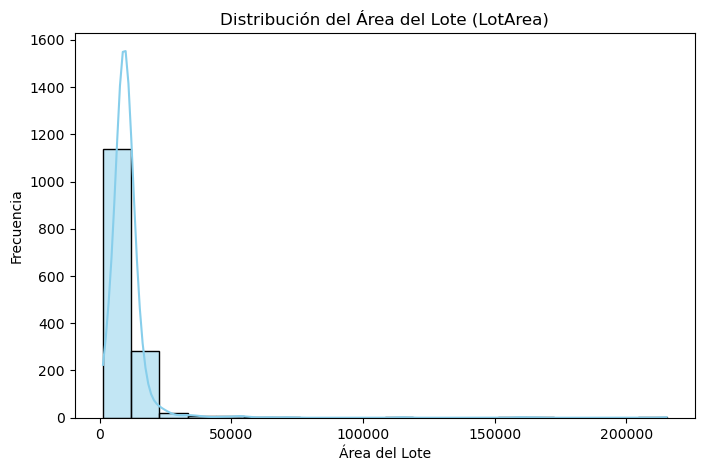

C:\Users\user\AppData\Local\Temp\ipykernel_16784\609787667.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MSZoning', y='SalePrice', palette='Set2')


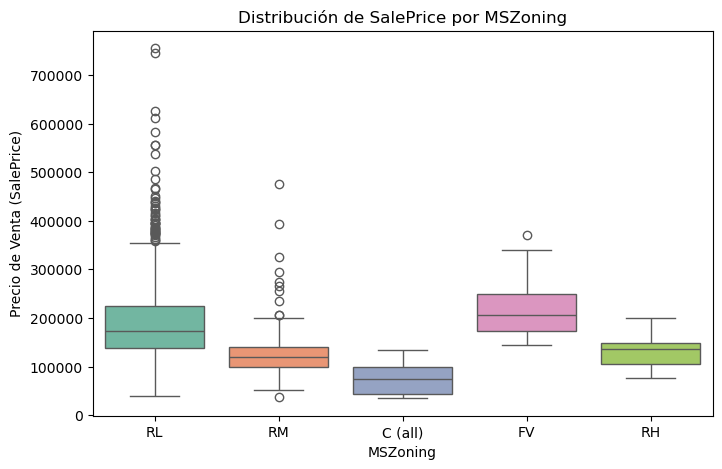

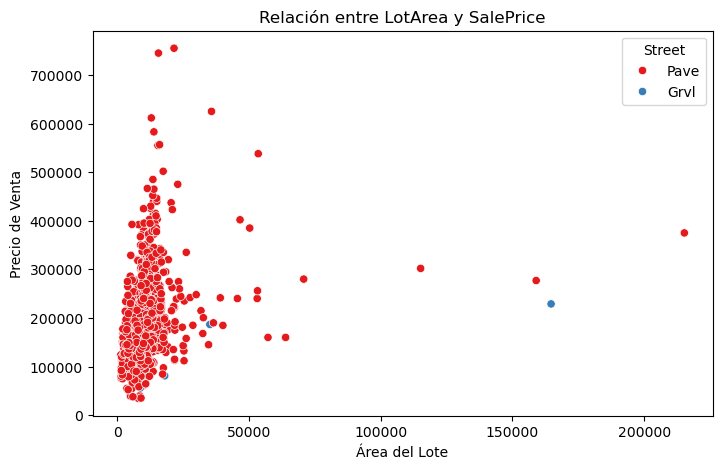

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploración de variables categóricas
categorical_columns = ['MSZoning', 'Street']  # Columnas categóricas a analizar
for col in categorical_columns:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts())

# Distribución de LotArea
plt.figure(figsize=(8, 5))
sns.histplot(df['LotArea'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribución del Área del Lote (LotArea)")
plt.xlabel("Área del Lote")
plt.ylabel("Frecuencia")
plt.show()

# Comparación de SalePrice por MSZoning
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='MSZoning', y='SalePrice', palette='Set2')
plt.title("Distribución de SalePrice por MSZoning")
plt.xlabel("MSZoning")
plt.ylabel("Precio de Venta (SalePrice)")
plt.show()

# Relación entre LotArea y SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='LotArea', y='SalePrice', hue='Street', palette='Set1')
plt.title("Relación entre LotArea y SalePrice")
plt.xlabel("Área del Lote")
plt.ylabel("Precio de Venta")
plt.show()


* Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.


Estadísticas descriptivas de las variables numéricas:
         GrLivArea  TotRmsAbvGrd  BedroomAbvGr  OverallQual  OverallCond  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      6.517808      2.866438     6.099315     5.575342   
std     525.480383      1.625393      0.815778     1.382997     1.112799   
min     334.000000      2.000000      0.000000     1.000000     1.000000   
25%    1129.500000      5.000000      2.000000     5.000000     5.000000   
50%    1464.000000      6.000000      3.000000     6.000000     5.000000   
75%    1776.750000      7.000000      3.000000     7.000000     6.000000   
max    5642.000000     14.000000      8.000000    10.000000     9.000000   

       TotRmsAbvGrd        LotArea  
count   1460.000000    1460.000000  
mean       6.517808   10516.828082  
std        1.625393    9981.264932  
min        2.000000    1300.000000  
25%        5.000000    7553.500000  
50%        6.000000    9478.500000  
7

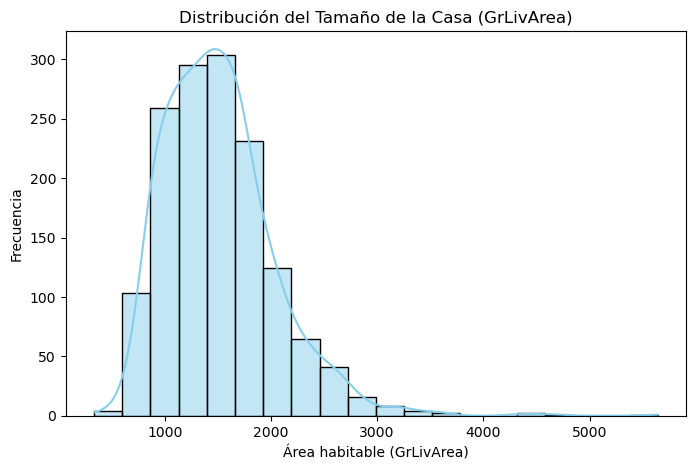

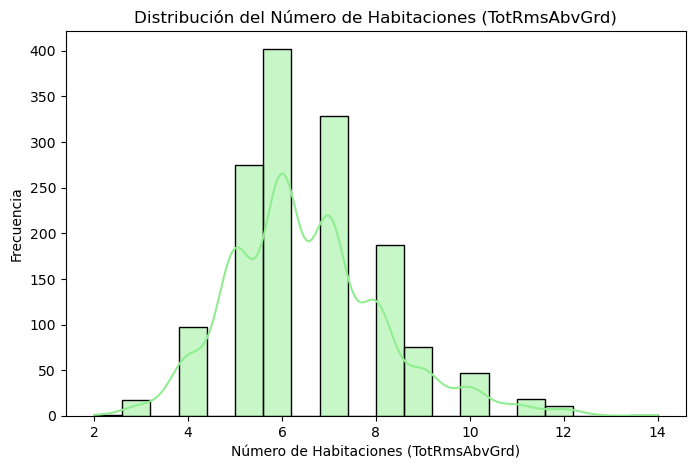

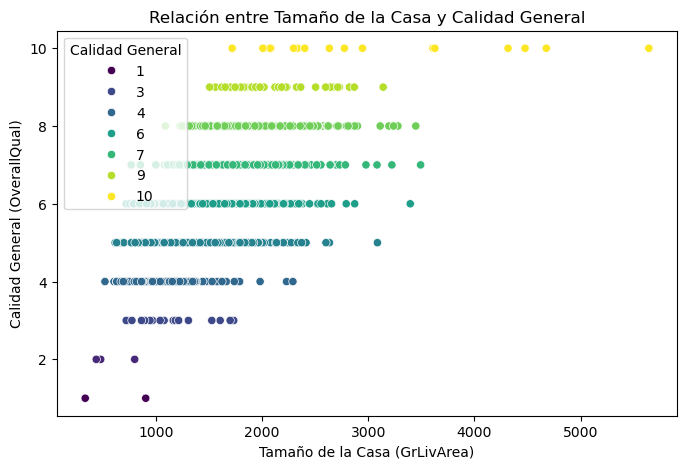

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1181475157.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='OverallQual', y='TotRmsAbvGrd', palette='Set2')


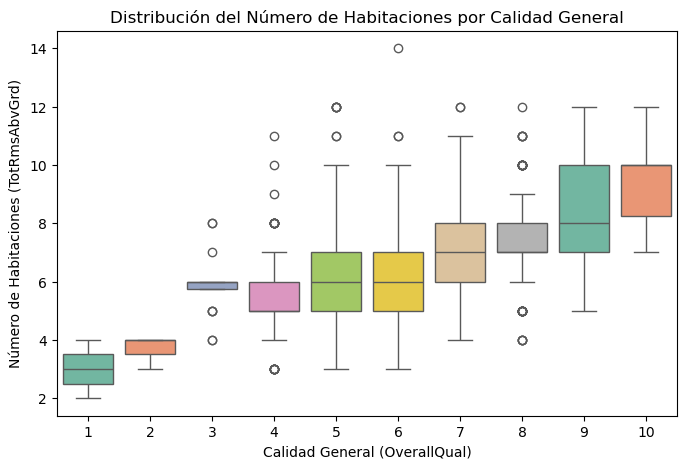


Valores únicos en MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Valores únicos en Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Valores únicos en HouseStyle:
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

Valores únicos en ExterCond:
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

Valores únicos en PoolQC:
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_16784\1181475157.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MSZoning', y='SalePrice', palette='Set2')


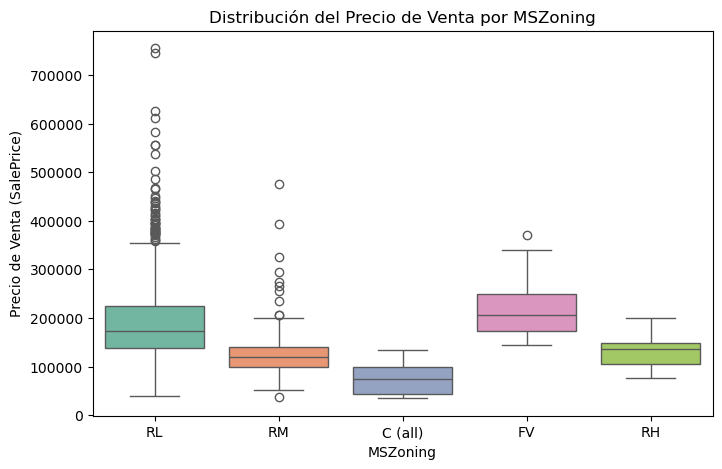

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1181475157.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Neighborhood', y='SalePrice', palette='Set3')


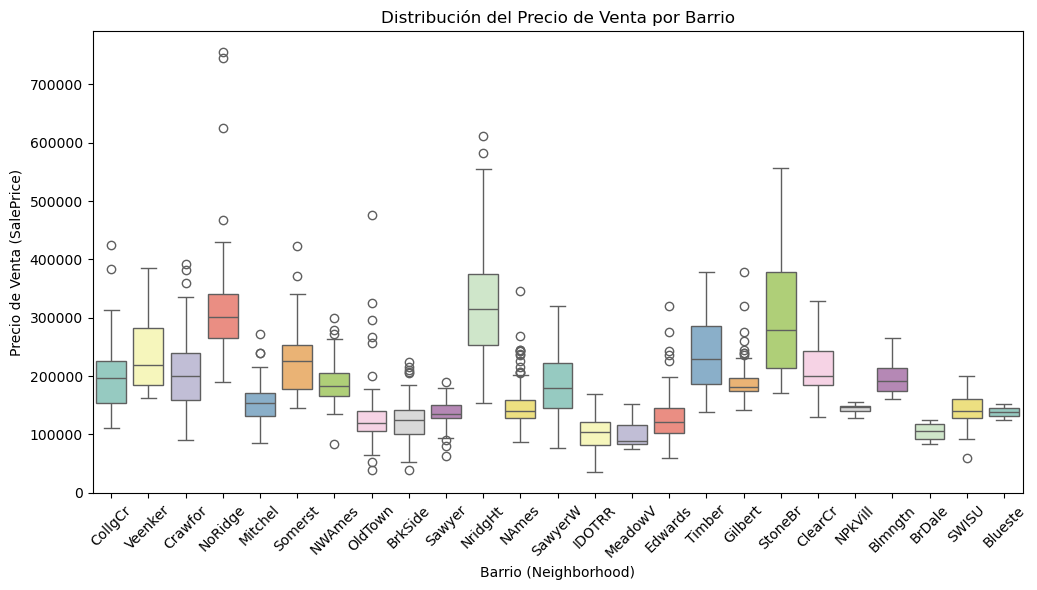

C:\Users\user\AppData\Local\Temp\ipykernel_16784\1181475157.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HouseStyle', y='SalePrice', palette='Set1')


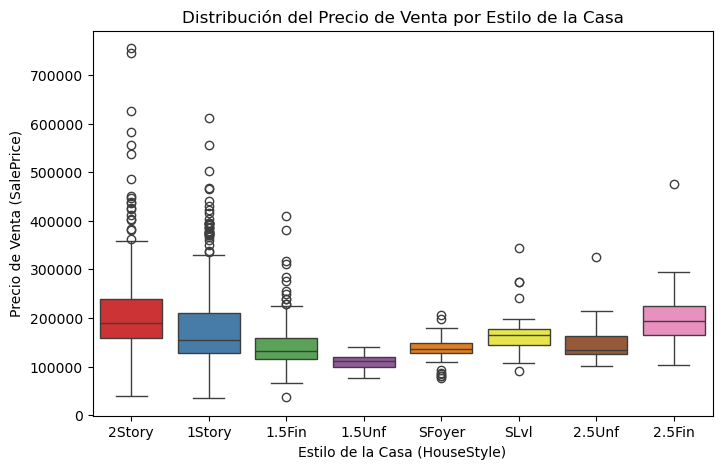

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploración inicial de las variables numéricas
numeric_columns = ['GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'LotArea']
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df[numeric_columns].describe())

# Distribución del tamaño de la casa (GrLivArea)
plt.figure(figsize=(8, 5))
sns.histplot(df['GrLivArea'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribución del Tamaño de la Casa (GrLivArea)")
plt.xlabel("Área habitable (GrLivArea)")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del número de habitaciones (TotRmsAbvGrd)
plt.figure(figsize=(8, 5))
sns.histplot(df['TotRmsAbvGrd'].dropna(), bins=20, kde=True, color='lightgreen')
plt.title("Distribución del Número de Habitaciones (TotRmsAbvGrd)")
plt.xlabel("Número de Habitaciones (TotRmsAbvGrd)")
plt.ylabel("Frecuencia")
plt.show()

# Relación entre la calidad general y el tamaño de la casa
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='GrLivArea', y='OverallQual', hue='OverallQual', palette='viridis')
plt.title("Relación entre Tamaño de la Casa y Calidad General")
plt.xlabel("Tamaño de la Casa (GrLivArea)")
plt.ylabel("Calidad General (OverallQual)")
plt.legend(title='Calidad General', loc='upper left')
plt.show()

# Relación entre la calidad general y el número de habitaciones
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='OverallQual', y='TotRmsAbvGrd', palette='Set2')
plt.title("Distribución del Número de Habitaciones por Calidad General")
plt.xlabel("Calidad General (OverallQual)")
plt.ylabel("Número de Habitaciones (TotRmsAbvGrd)")
plt.show()

# Exploración de las variables categóricas relacionadas con la casa
categorical_columns = ['MSZoning', 'Neighborhood', 'HouseStyle', 'ExterCond', 'PoolQC']
for col in categorical_columns:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts())

# Comparación de SalePrice por MSZoning
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='MSZoning', y='SalePrice', palette='Set2')
plt.title("Distribución del Precio de Venta por MSZoning")
plt.xlabel("MSZoning")
plt.ylabel("Precio de Venta (SalePrice)")
plt.show()

# Comparación de SalePrice por Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', palette='Set3')
plt.title("Distribución del Precio de Venta por Barrio")
plt.xlabel("Barrio (Neighborhood)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.xticks(rotation=45)
plt.show()

# Comparación de SalePrice por HouseStyle
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='HouseStyle', y='SalePrice', palette='Set1')
plt.title("Distribución del Precio de Venta por Estilo de la Casa")
plt.xlabel("Estilo de la Casa (HouseStyle)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.show()


* Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

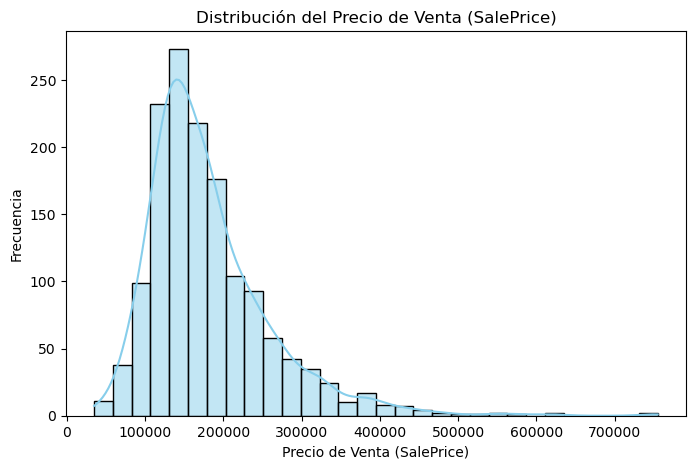


Estadísticas descriptivas de 'SalePrice':
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Asimetría de 'SalePrice': 1.8828757597682129


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualización de la distribución de la variable objetivo (SalePrice)
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribución del Precio de Venta (SalePrice)")
plt.xlabel("Precio de Venta (SalePrice)")
plt.ylabel("Frecuencia")
plt.show()

# Estadísticas descriptivas de la variable objetivo (SalePrice)
print("\nEstadísticas descriptivas de 'SalePrice':")
print(df['SalePrice'].describe())

# Calcular la asimetría (skewness) de la distribución
skewness = df['SalePrice'].skew()
print(f"\nAsimetría de 'SalePrice': {skewness}")

# Si la asimetría es mayor que 0, hay un sesgo positivo (a la derecha).
# Si la asimetría es menor que 0, hay un sesgo negativo (a la izquierda).
# Si la asimetría es cerca de 0, la distribución es aproximadamente simétrica.


**Observacion:**

* El precio de las casas (SalePrice) muestra una distribución sesgada, con una media de 180,921.20 y una desviación estándar de 79,442.50, lo que indica una gran variabilidad en los precios. El precio más bajo es 34,900, mientras que el más alto alcanza 755,000.

* La mayoría de las casas tienen precios bajos o moderados, pero algunos precios muy altos, especialmente de casas de lujo, están "empujando" la distribución hacia la derecha, lo que genera un sesgo positivo (asimetría de 1.88). Esto es común en bienes raíces, donde algunas propiedades exclusivas pueden distorsionar los precios promedio.

* Este sesgo sugiere que sería útil aplicar una transformación logarítmica para hacer la distribución más simétrica y mejorar los modelos predictivos.

**Exploración y preprocesamiento de datos:**
* Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
* También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

**Exploración visual de las variables numéricas**

**Calcular la asimetría y detectar outliers**

In [11]:
# Calcular asimetría para cada variable numérica
skewness = df_numeric.skew()
print(skewness)


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

**Outliers: rango intercuartílico (IQR):**

In [12]:
# Detectar outliers con IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR)))
print(outliers.sum())


Id                 0
MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        96
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt        0
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64


**Transformación de variables asimétricas**

In [13]:
# Transformación logarítmica de variables con alta asimetría
for col in skewness.index:
    if skewness[col] > 1:
        df[col] = df[col].apply(lambda x: np.log(x + 1))


**Normalización o estandarización**

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización (media 0, desviación estándar 1)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalización (rango [0, 1])
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)


**Verificación de los resultados**

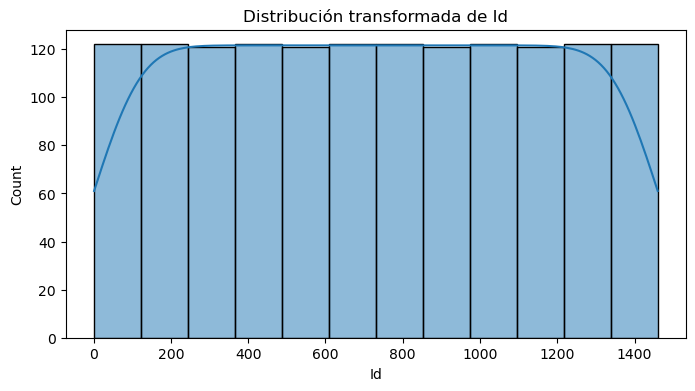

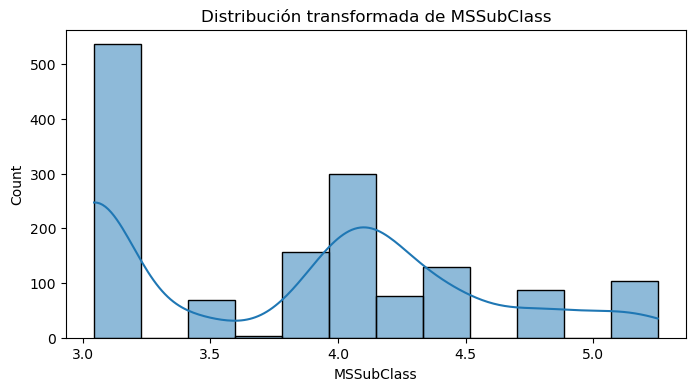

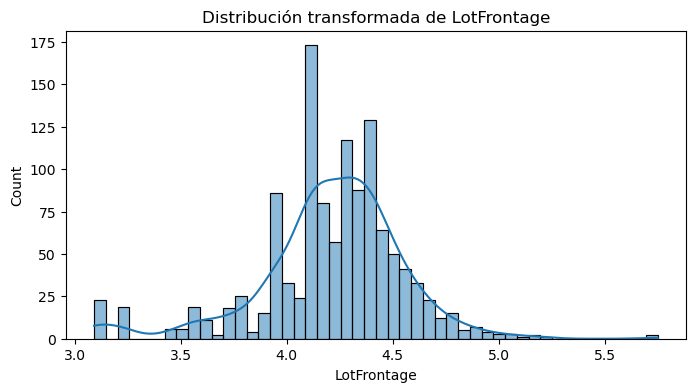

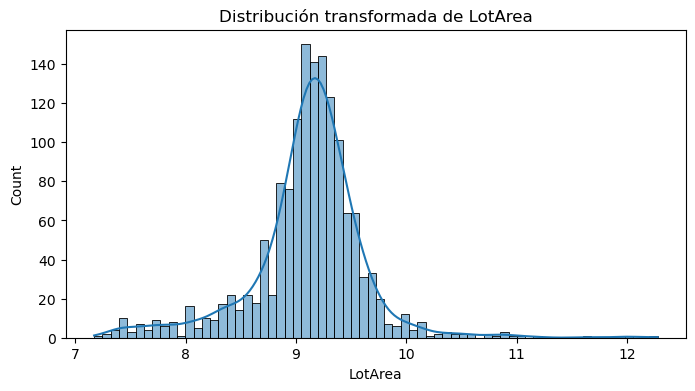

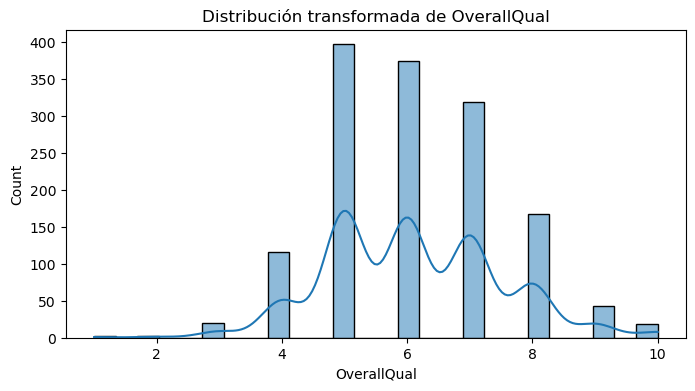

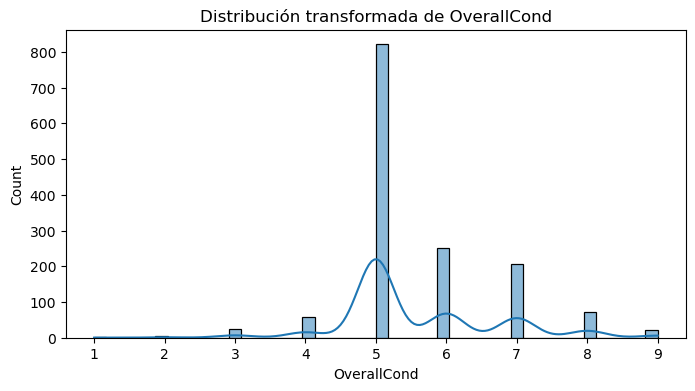

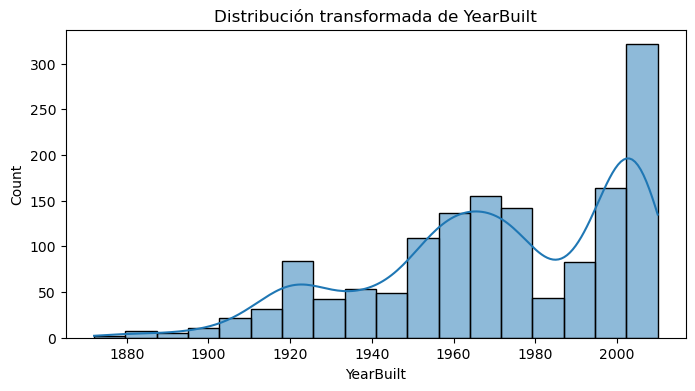

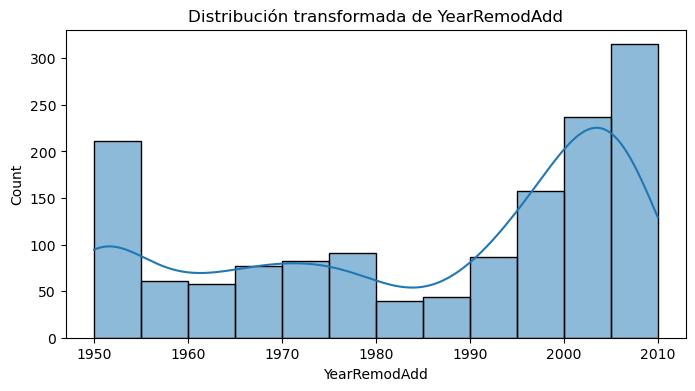

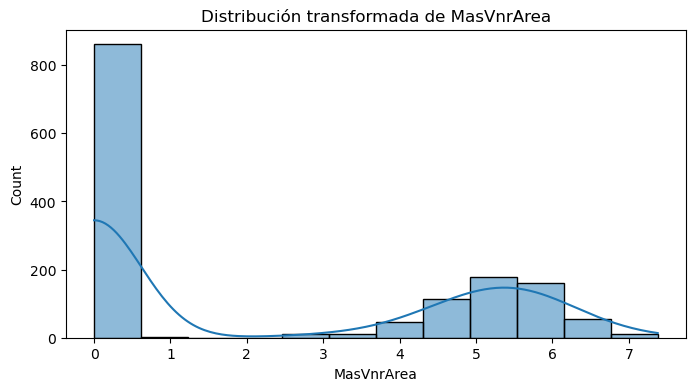

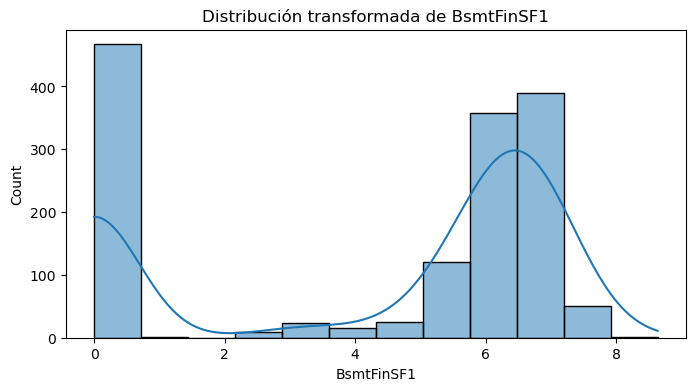

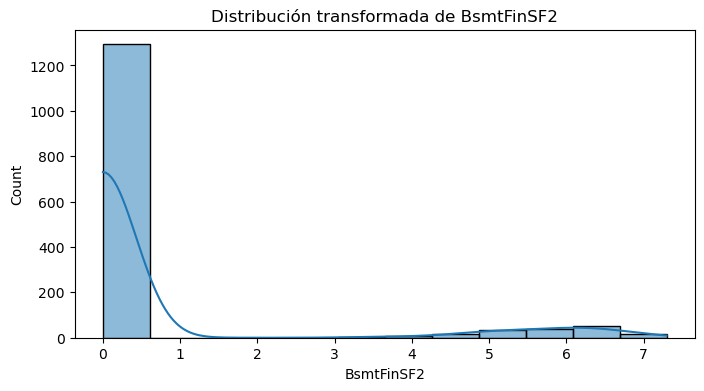

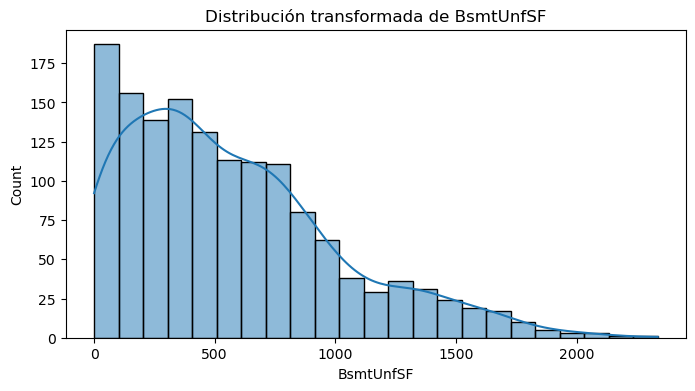

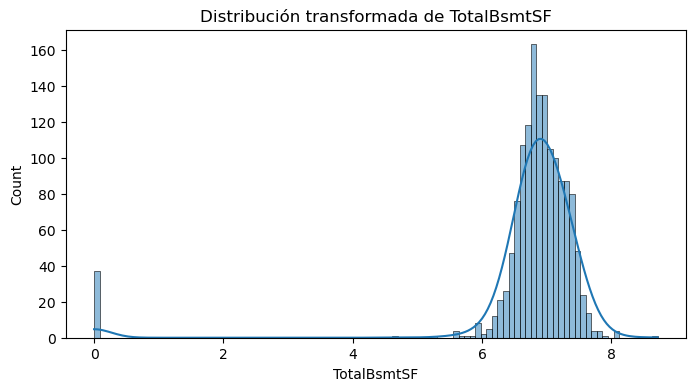

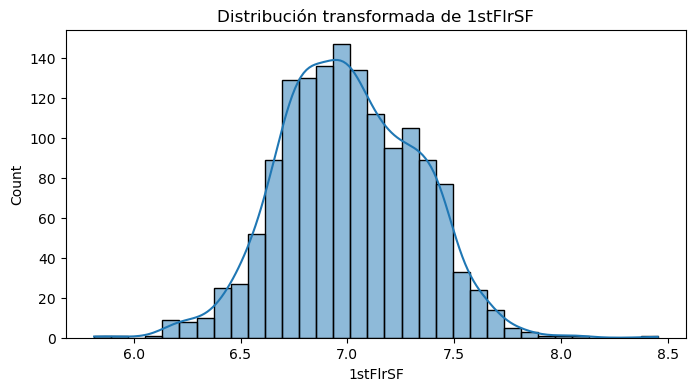

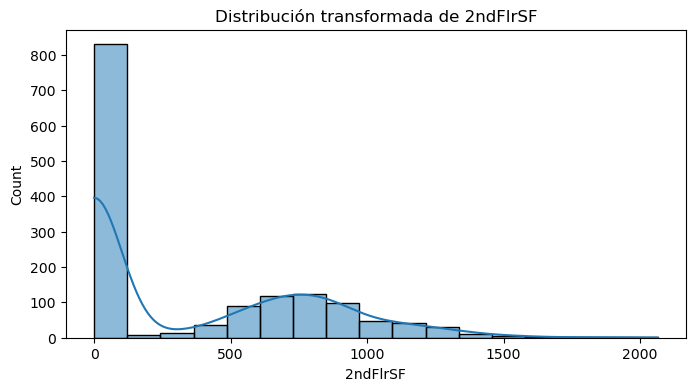

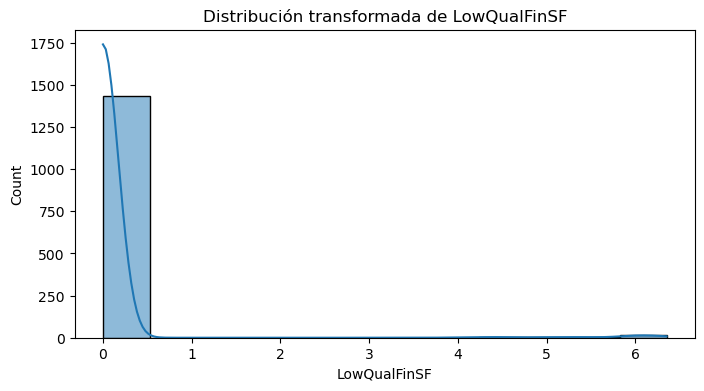

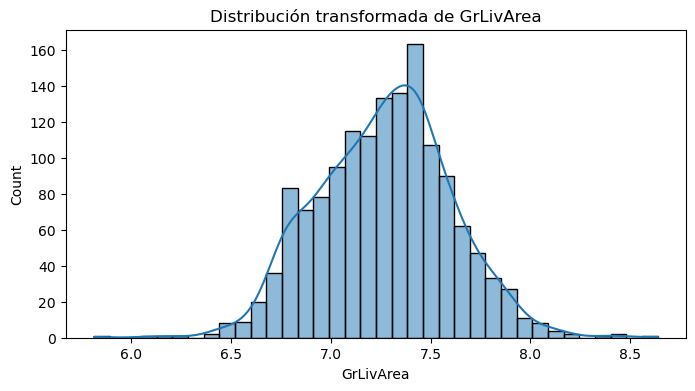

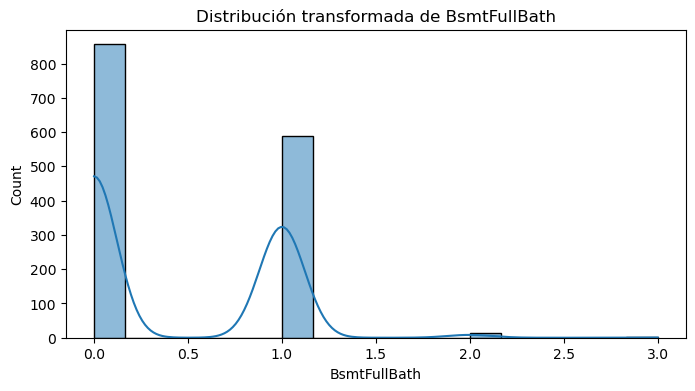

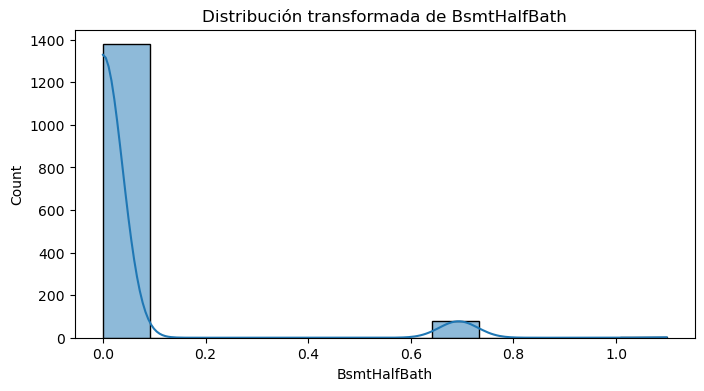

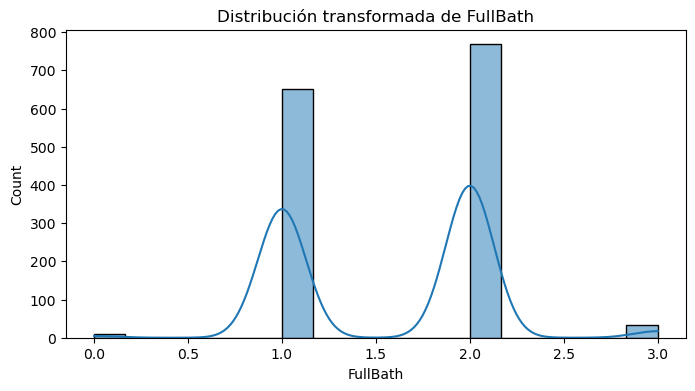

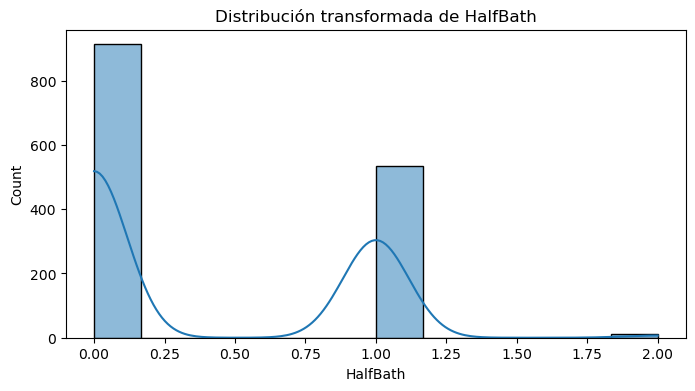

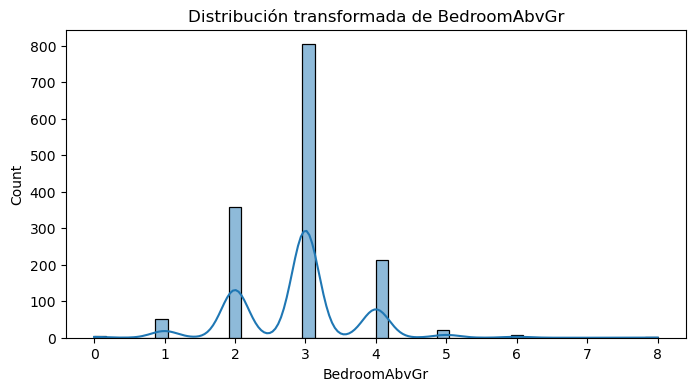

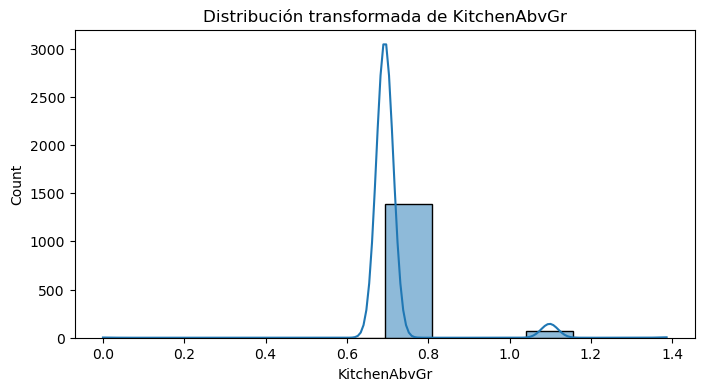

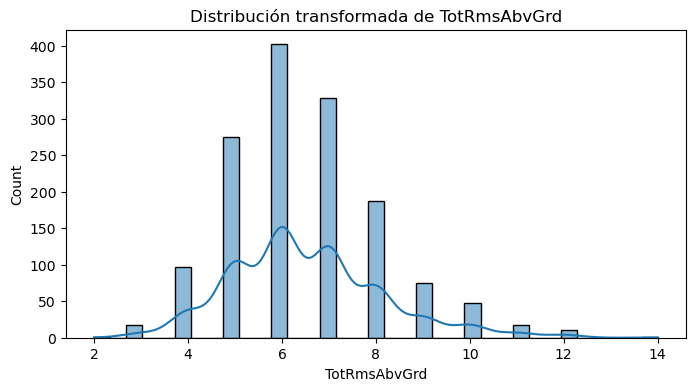

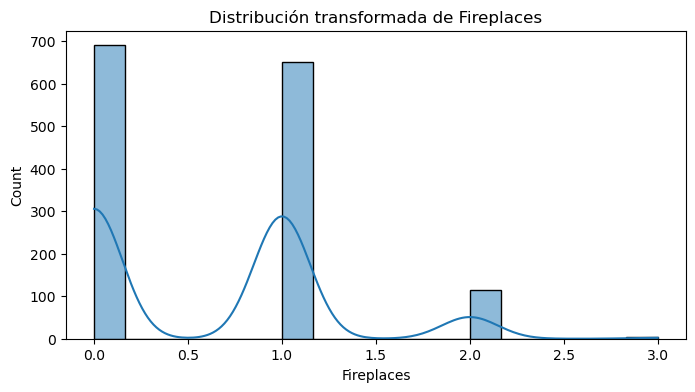

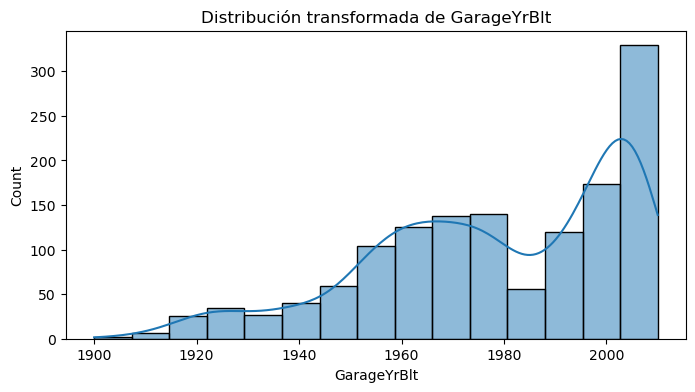

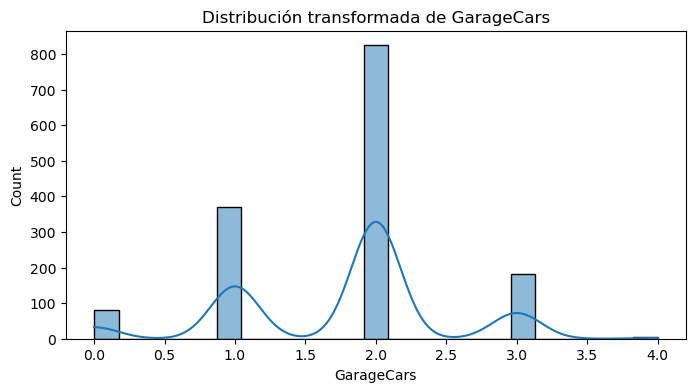

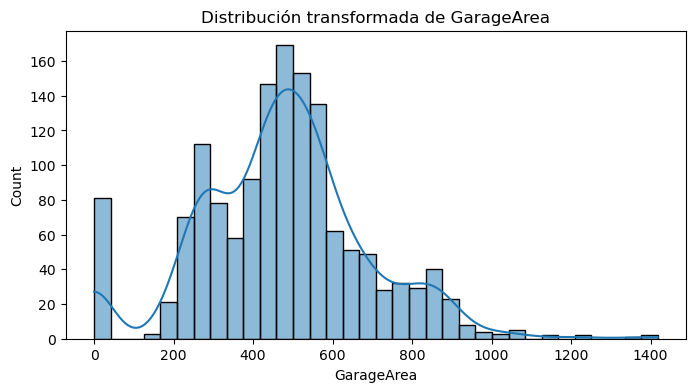

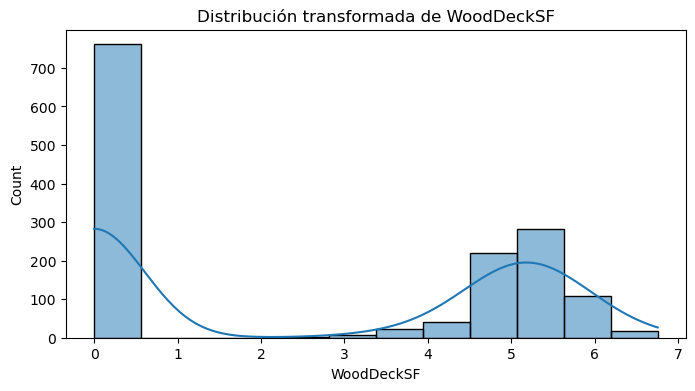

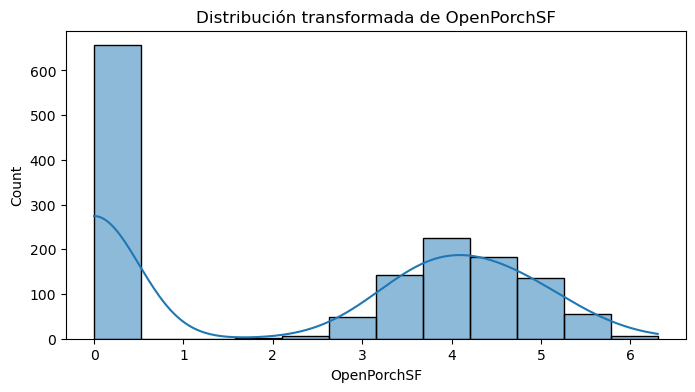

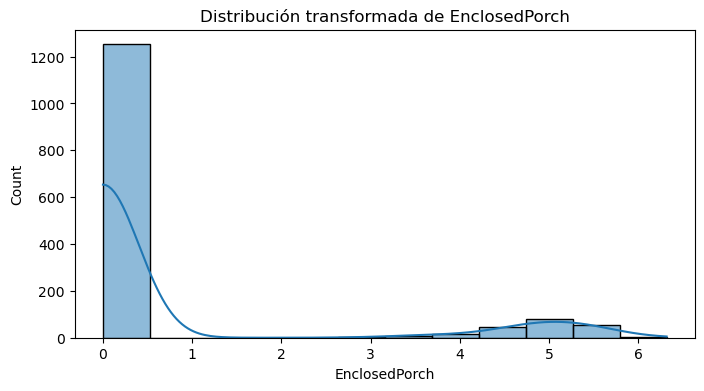

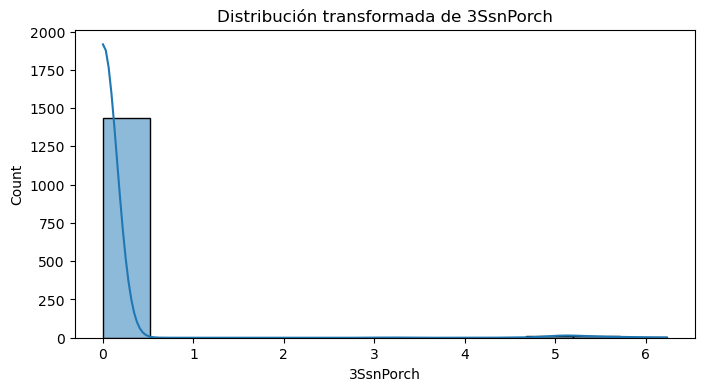

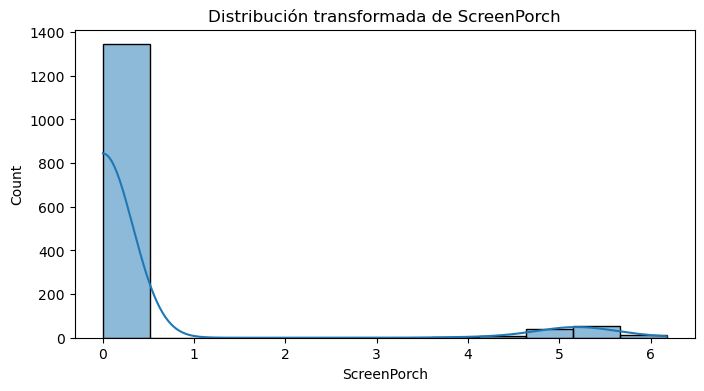

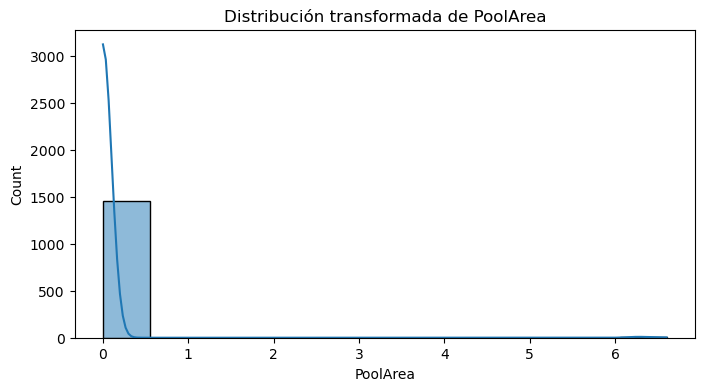

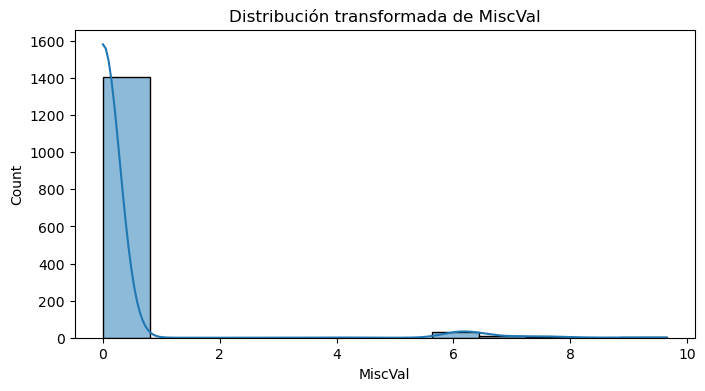

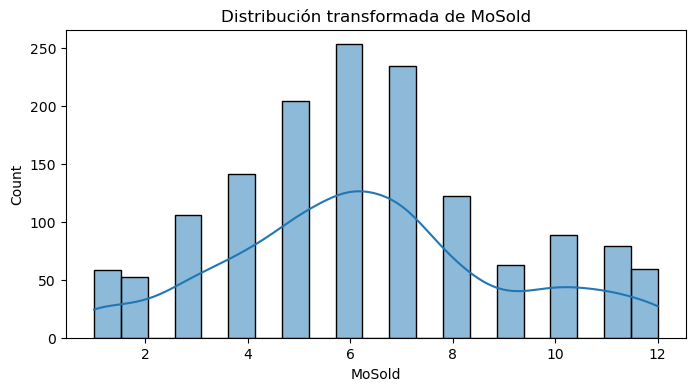

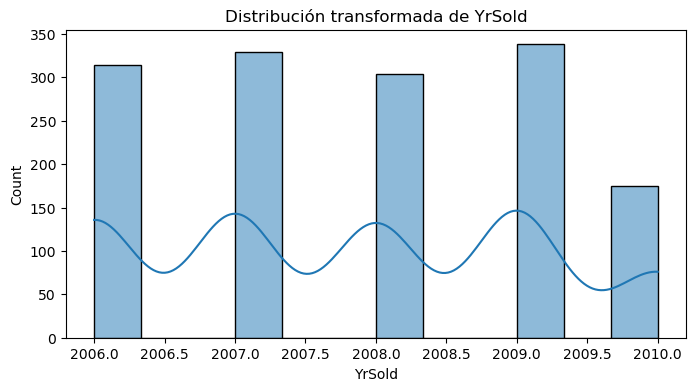

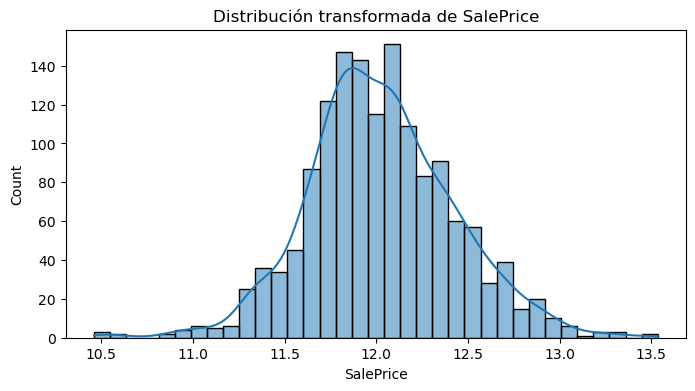

In [15]:
# Graficar las distribuciones después de las transformaciones
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución transformada de {col}')
    plt.show()


**Resumen**
* Transformación logarítmica: Utiliza para variables con asimetría positiva (como el precio de la casa) para hacer las distribuciones más simétricas.
* Normalización o estandarización: Aplica para variables que tienen escalas diferentes para asegurarte de que todas las variables tienen el mismo peso en los modelos predictivos.

Este preprocesamiento puede mejorar el rendimiento de los modelos de Machine Learning al asegurar que las variables sean comparables y las distribuciones sean más normales.

* Identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

In [16]:
# Estadísticas descriptivas de las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
print(df_numeric.describe().T)


                count         mean         std          min          25%  \
Id             1460.0   730.500000  421.610009     1.000000   365.750000   
MSSubClass     1460.0     3.818794    0.688354     3.044522     3.044522   
LotFrontage    1201.0     4.207109    0.346228     3.091042     4.094345   
LotArea        1460.0     9.110966    0.517369     7.170888     8.929898   
OverallQual    1460.0     6.099315    1.382997     1.000000     5.000000   
OverallCond    1460.0     5.575342    1.112799     1.000000     5.000000   
YearBuilt      1460.0  1971.267808   30.202904  1872.000000  1954.000000   
YearRemodAdd   1460.0  1984.865753   20.645407  1950.000000  1967.000000   
MasVnrArea     1452.0     2.131946    2.631265     0.000000     0.000000   
BsmtFinSF1     1460.0     4.229731    2.992052     0.000000     0.000000   
BsmtFinSF2     1460.0     0.655398    1.845045     0.000000     0.000000   
BsmtUnfSF      1460.0   567.240411  441.866955     0.000000   223.000000   
TotalBsmtSF 

**Transformaciones de variables:**
* Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.

Pasos para aplicar transformaciones logarítmicas
* **Identificación de variables sesgadas**

In [17]:
from scipy.stats import skew

# Filtrar variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular asimetría
skewed_features = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Mostrar variables con sesgo alto (por ejemplo, mayor a 0.75)
high_skew = skewed_features[skewed_features > 0.75]
print("Variables con sesgo significativo:\n", high_skew)


Variables con sesgo significativo:
 PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64


* **Aplicar la transformación logarítmica**

In [18]:
import numpy as np

# Transformar SalePrice
df['SalePrice_Log'] = np.log1p(df['SalePrice'])

# Transformar otras variables sesgadas
for feature in high_skew.index:
    df[f'{feature}_Log'] = np.log1p(df[feature])


* **Verificación de la transformación**

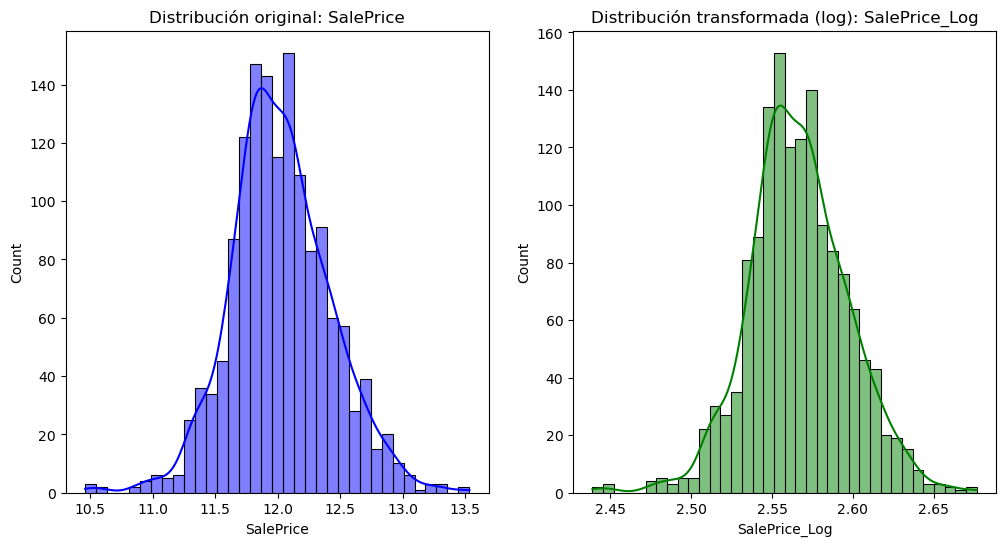

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar distribución original vs transformada para SalePrice
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, color="blue")
plt.title("Distribución original: SalePrice")

plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice_Log'], kde=True, color="green")
plt.title("Distribución transformada (log): SalePrice_Log")

plt.show()


Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.

* **Crear nuevas características**

In [20]:
# Variables seleccionadas
variables_seleccionadas = ['GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'OverallQual']

# Crear variables cuadráticas y cúbicas
for var in variables_seleccionadas:
    df[f'{var}_Squared'] = df[var] ** 2  # Cuadrado
    df[f'{var}_Cubed'] = df[var] ** 3    # Cubo


* **Verificar correlaciones con la variable objetivo**

In [21]:
# Correlación con SalePrice
correlation_matrix = df[[f'{var}_Squared' for var in variables_seleccionadas] + 
                        [f'{var}_Cubed' for var in variables_seleccionadas] + 
                        ['SalePrice']].corr()

# Mostrar las correlaciones con SalePrice
print(correlation_matrix['SalePrice'].sort_values(ascending=False))


SalePrice               1.000000
OverallQual_Squared     0.812374
OverallQual_Cubed       0.793031
GrLivArea_Squared       0.729497
GrLivArea_Cubed         0.727815
TotalBsmtSF_Cubed       0.559329
TotRmsAbvGrd_Squared    0.510422
TotalBsmtSF_Squared     0.490981
TotRmsAbvGrd_Cubed      0.471963
Name: SalePrice, dtype: float64


* **Evaluar distribuciones de las nuevas variables**

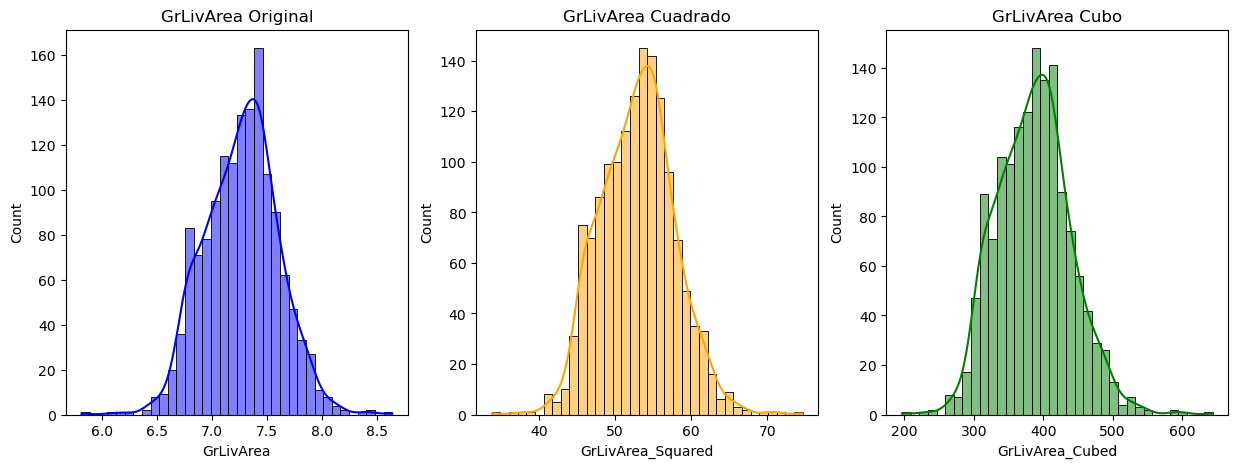

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar distribuciones para GrLivArea original y sus transformaciones
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['GrLivArea'], kde=True, color='blue')
plt.title("GrLivArea Original")

plt.subplot(1, 3, 2)
sns.histplot(df['GrLivArea_Squared'], kde=True, color='orange')
plt.title("GrLivArea Cuadrado")

plt.subplot(1, 3, 3)
sns.histplot(df['GrLivArea_Cubed'], kde=True, color='green')
plt.title("GrLivArea Cubo")

plt.show()


In [25]:
print(df['GrLivArea_Squared'].describe(), df['GrLivArea_Cubed'].describe().T)


count    1460.000000
mean       52.942278
std         4.847450
min        33.804114
25%        49.426736
50%        53.138422
75%        55.996839
max        74.618000
Name: GrLivArea_Squared, dtype: float64 count    1460.000000
mean      386.425168
std        53.059249
min       196.541530
25%       347.490472
50%       387.358397
75%       419.030152
max       644.563055
Name: GrLivArea_Cubed, dtype: float64


**Interpretación general:**
* Relación con el tamaño original (GrLivArea):

Las transformaciones resaltan la variación entre las casas pequeñas y grandes.
Los valores elevados al cuadrado y al cubo amplifican las diferencias en tamaños grandes, lo que puede ser útil para capturar relaciones no lineales con el precio.
* Distribución:

Ambas características muestran una dispersión moderada, con valores crecientes en las casas más grandes.
Los valores cúbicos muestran una mayor variación, como era de esperarse, dado que amplifican aún más los valores grandes.
Posible uso en modelos:

Estas transformaciones pueden ser útiles para modelar relaciones no lineales entre el tamaño de la casa y la variable objetivo (SalePrice).
Las diferencias amplificadas en los valores más altos pueden ayudar a capturar efectos diferenciados en las casas de mayor tamaño.


---

* Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Suponiendo que df es tu DataFrame con las variables numéricas
# Seleccionar solo las variables numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las variables numéricas
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Ver las primeras filas para verificar
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtUnfSF_Log,2ndFlrSF_Log,GrLivArea_Squared,GrLivArea_Cubed,TotalBsmtSF_Squared,TotalBsmtSF_Cubed,TotRmsAbvGrd_Squared,TotRmsAbvGrd_Cubed,OverallQual_Squared,OverallQual_Cubed
0,-1.730865,0.424462,RL,-0.050433,-0.133270,Pave,NaN,Reg,Lvl,AllPub,...,-0.340511,1.180528,0.512458,0.494122,-0.141248,-0.251494,0.809230,0.658054,0.565166,0.453797
1,-1.728492,-1.125202,RL,0.541314,0.113413,Pave,NaN,Reg,Lvl,AllPub,...,0.002218,-0.870117,-0.401358,-0.419305,0.456687,0.514743,-0.391021,-0.420541,-0.177948,-0.261699
2,-1.726120,0.424462,RL,0.078009,0.420049,Pave,NaN,IR1,Lvl,AllPub,...,0.230372,1.184762,0.646388,0.631161,-0.032725,-0.115620,-0.391021,-0.420541,0.565166,0.453797
3,-1.723747,0.645073,RL,-0.278068,0.103317,Pave,NaN,IR1,Lvl,AllPub,...,0.348034,1.143550,0.525007,0.506928,-0.325503,-0.478861,0.166238,0.042234,0.565166,0.453797
4,-1.721374,0.424462,RL,0.680593,0.878431,Pave,NaN,IR1,Lvl,AllPub,...,0.295711,1.244087,1.296468,1.307547,0.303667,0.314600,1.537954,1.448780,1.422605,1.405914


**Evaluación de las transformaciones:**
* Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
* Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1. Dividir los datos en entrenamiento y prueba
X = df.drop(columns=['SalePrice'])  # Variables predictoras
y = df['SalePrice']                # Variable objetivo

# 2. Imputar los valores faltantes usando la moda
imputer = SimpleImputer(strategy="most_frequent")  # Imputar con la moda (valor más frecuente)
X_imputed = imputer.fit_transform(X)               # Aplica la imputación a X

# 3. Convertir columnas categóricas a valores numéricos con LabelEncoder
# Aplicar LabelEncoder a cada columna categórica
label_encoders = {}  # Para almacenar los LabelEncoders de cada columna

for column in X.columns:
    if X[column].dtype == 'object':  # Si la columna es categórica
        le = LabelEncoder()
        X_imputed[:, X.columns.get_loc(column)] = le.fit_transform(X_imputed[:, X.columns.get_loc(column)])
        label_encoders[column] = le  # Guardar el encoder para futura referencia

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo base (sin transformaciones)
model_base = LinearRegression()
model_base.fit(X_train, y_train)

# Predicción y evaluación del modelo base
y_pred_base = model_base.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = r2_score(y_test, y_pred_base)

# 5. Entrenar el modelo con transformaciones (como el modelo base, ya con imputación y LabelEncoder)
model_transformed = LinearRegression()
model_transformed.fit(X_train, y_train)

# Predicción y evaluación del modelo transformado
y_pred_transformed = model_transformed.predict(X_test)
rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred_transformed))
r2_transformed = r2_score(y_test, y_pred_transformed)

# 6. Mostrar los resultados
print("Modelo Base:")
print(f"RMSE: {rmse_base}")
print(f"R-squared: {r2_base}\n")

print("Modelo con Transformaciones:")
print(f"RMSE: {rmse_transformed}")
print(f"R-squared: {r2_transformed}")


Modelo Base:
RMSE: 0.021696259494795922
R-squared: 0.9995977850337938

Modelo con Transformaciones:
RMSE: 0.021696259494795922
R-squared: 0.9995977850337938


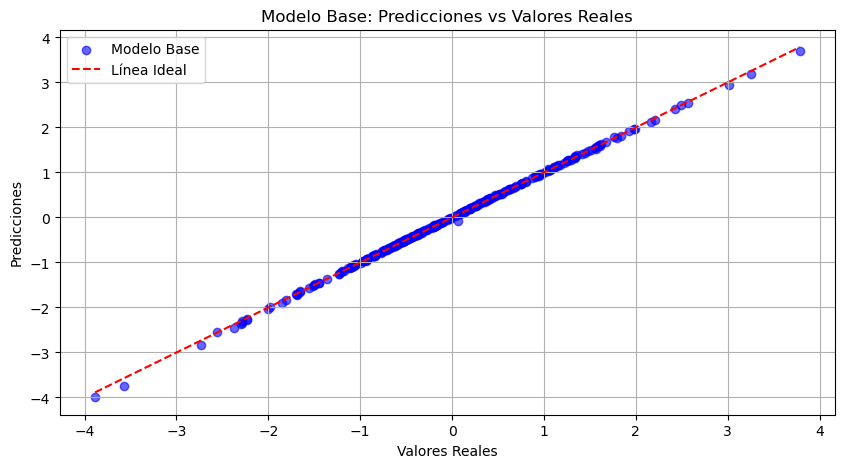

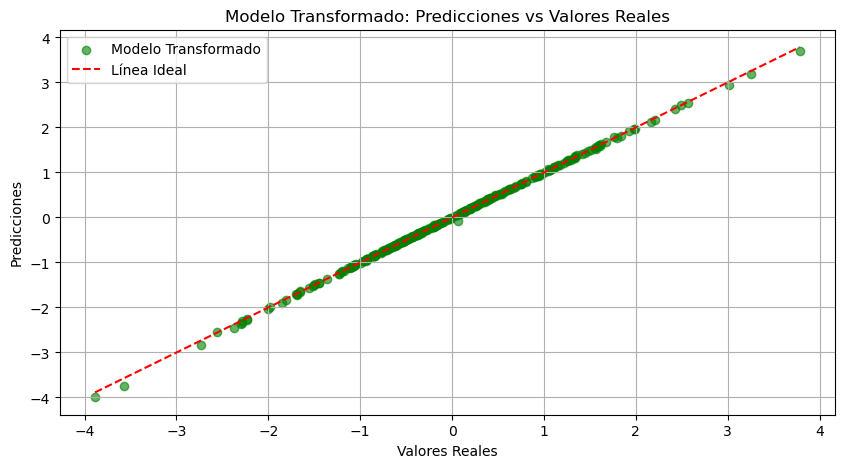

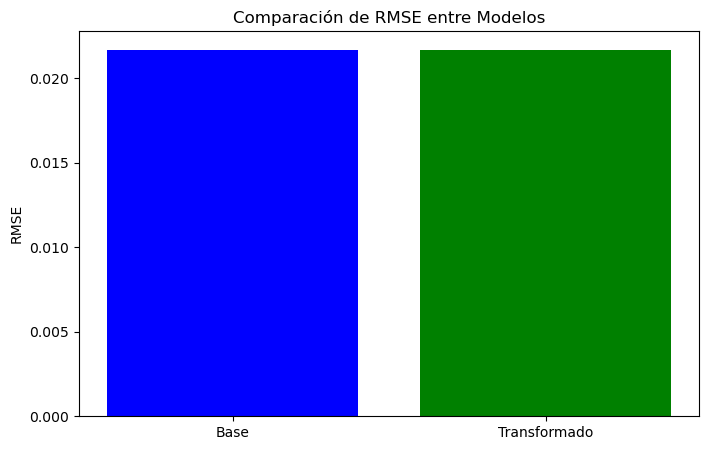

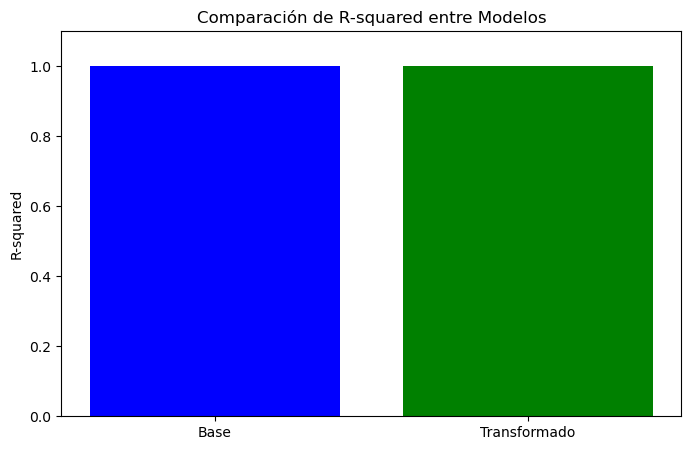

In [32]:
import matplotlib.pyplot as plt

# 1. Comparación entre los valores reales y las predicciones del modelo base
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_base, alpha=0.6, color='blue', label='Modelo Base')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title("Modelo Base: Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid(True)
plt.show()

# 2. Comparación entre los valores reales y las predicciones del modelo transformado
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_transformed, alpha=0.6, color='green', label='Modelo Transformado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title("Modelo Transformado: Predicciones vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid(True)
plt.show()

# 3. Comparación de RMSE entre los dos modelos
model_names = ['Base', 'Transformado']
rmse_values = [rmse_base, rmse_transformed]

plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_values, color=['blue', 'green'])
plt.title("Comparación de RMSE entre Modelos")
plt.ylabel("RMSE")
plt.show()

# 4. Comparación de R² entre los dos modelos
r2_values = [r2_base, r2_transformed]

plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color=['blue', 'green'])
plt.title("Comparación de R-squared entre Modelos")
plt.ylabel("R-squared")
plt.ylim(0, 1.1)  # Limitar entre 0 y 1.1 para mostrar mejor la métrica
plt.show()


**Explicación de los gráficos:**

Predicciones vs Valores Reales (Modelo Base y Modelo Transformado):

* Muestra cómo se alinean las predicciones del modelo con los valores reales.
* La línea roja indica la relación ideal, donde las predicciones son iguales a los valores reales.

Comparación de RMSE:

* Representa los errores de los dos modelos. Un valor menor indica un mejor ajuste.

Comparación de R²:

* Mide la proporción de la variación explicada por el modelo. Un valor más cercano a 1 indica mejor ajuste.

# **Interpretación de los resultados:**
* Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
* Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.

### Análisis de Transformaciones y Rendimiento del Modelo

Las transformaciones realizadas en los datos, como la imputación de valores faltantes con la moda y la conversión de variables categóricas a formato numérico mediante `LabelEncoder`, fueron necesarias para preparar los datos correctamente. Sin embargo, su impacto en el rendimiento del modelo fue limitado, dado que tanto el modelo base como el modelo transformado lograron resultados sobresalientes, con un **RMSE** muy bajo (0.0217) y un **R²** cercano a 1 (0.9996).

### Impacto de las Transformaciones

### Transformaciones Logarítmicas
Estas equilibran distribuciones sesgadas y reducen el impacto de valores extremos. Aunque útiles en otros casos, aquí no produjeron mejoras significativas porque las variables ya estaban bien distribuidas.

### Variables Polinómicas
Diseñadas para capturar relaciones no lineales, no tuvieron un efecto relevante, lo que indica que las relaciones eran principalmente lineales y el modelo base ya las representaba adecuadamente.

### Transformación de Variables Categóricas y Manejo de Valores Faltantes
Aunque no mejoraron directamente las métricas, garantizaron la compatibilidad de los datos con el modelo y su estabilidad.

### Reflexión

El análisis demuestra que, aunque las transformaciones son esenciales en muchos problemas de machine learning para manejar sesgos y mejorar la estabilidad del modelo, su relevancia depende de la calidad y naturaleza de los datos. En este caso, las transformaciones no afectaron significativamente los resultados porque los datos originales eran adecuados para la tarea.

### Conclusión

Las transformaciones son un paso importante para robustecer el modelo y asegurar su rendimiento en escenarios más complejos. Sin embargo, es crucial evaluar su necesidad según las características de los datos y el problema a resolver.
